In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline

from venn import venn
from scipy.stats import fisher_exact

In [62]:
mutect_df = pd.read_csv("../immortal_simon/mutect/DATA_MUTECT.tsv", sep="\t")
sv_df = pd.read_csv("../immortal_simon/gridss/DATA_GRIDSS.tsv", sep="\t").drop_duplicates()
type_list = {'MUTECT':mutect_df, 'SV':sv_df}

In [63]:
samples = pd.read_csv("../data/samples/SAMPLES_Excel.tsv", sep="\t")
samples['label'] = samples.apply(lambda x: "T" if x['TMM'] == 'TEL' else "M"
                                 if (x['WestATRX'] == "Neg" or x['WestDAXX'] == "Neg") else "AP",
                                 axis=1)

In [64]:
samples = samples[samples['Mortal'].str.contains('JFCF')]

In [65]:
gene_list = ['ATRX', 'DAXX', 'TP53']
sample_list = np.concatenate(
    (samples['Immortal'].unique(), samples['Mortal'].unique()))
type_list = {'Somatic': mutect_df, 'SV': sv_df}
sv_df = sv_df[sv_df['Key'].str.contains('_Somatic')]

In [66]:
mapping = dict(zip(samples['Immortal'].values, samples['label'].values))
combined_df_all = pd.concat([mutect_df, sv_df])

In [67]:
df = combined_df_all[(combined_df_all['Name'] != 'JFCF_6_P_pLKO_5') &
                     (combined_df_all['Name'].str.contains('JFCF'))].sort_values(
                         by=['Key', 'Name'])

df = df.drop_duplicates(subset=df.columns.values[df.columns.values!='Consequence'])
df = df.drop_duplicates(subset=['Key', 'Name'])

In [68]:
df_TEL = df[df['Name'].isin(samples[samples['TMM']=='TEL']['Immortal'])]
df_ALT = df[df['Name'].isin(samples[samples['TMM']=='ALT']['Immortal'])]
df_Mortal = df[df['Name'].isin(samples['Mortal'])]

# ALT vs TEL mutations

In [69]:
mutations = {
    'TEL': set(df_TEL['Key']),
    'ALT': set(df_ALT['Key'])
}

Text(0.5, 1.0, 'TEL/ALT/Mortal Distinct Mutations')

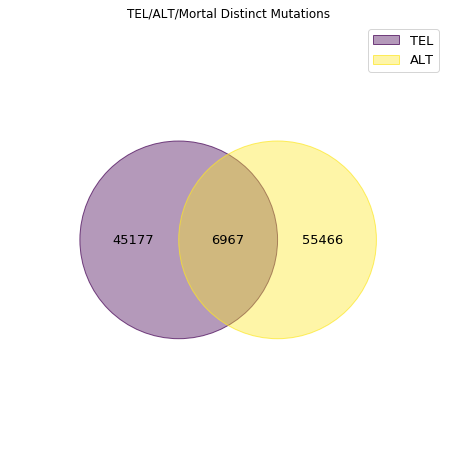

In [70]:
venn(mutations)
plt.title("TEL/ALT/Mortal Distinct Mutations")

In [71]:
res = pd.DataFrame({'Key':df['Key'].unique()})
for key, value in mutations.items():
    res[key] = res['Key'].map(lambda x:True if x in value else False)
key_gene = df.groupby(['Key','Gene','Consequence']).size().reset_index().drop([0], axis=1)

key_gene = key_gene.drop_duplicates("Key", keep='first')

res = pd.merge(res, key_gene, on=['Key'])

res = res.sort_values(by=['Gene','Key'])

In [72]:
res.to_csv("../results/mutations_TEL_ALT_somatic_new.tsv", index=False, sep="\t")

In [73]:
mutations_genes = {
    'TEL': set(df_TEL['Gene']),
    'ALT': set(df_ALT['Gene'])
}

Text(0.5, 1.0, 'TEL/ALT/Mortal Mutated Genes')

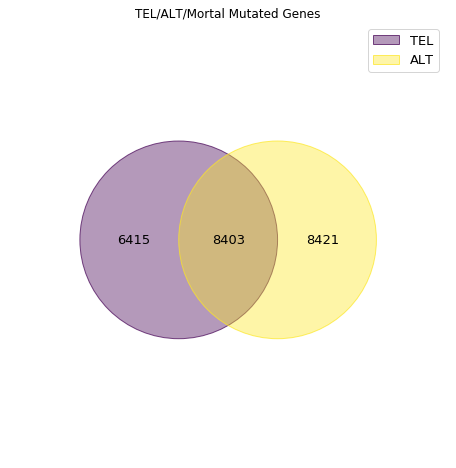

In [74]:
venn(mutations_genes)
plt.title("TEL/ALT/Mortal Mutated Genes")

In [75]:
tel_only = set(df_TEL['Key']) - set(df_ALT['Key']) - set(df_Mortal['Key'])
alt_only = set(df_ALT['Key']) - set(df_TEL['Key']) - set(df_Mortal['Key'])
mortal_only = set(df_Mortal['Key']) - set(df_ALT['Key']) - set(df_TEL['Key'])

In [76]:
alt_mutations = df[df['Key'].isin(alt_only)][['Gene', 'Name', 'Impact']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).reset_index()

In [77]:
tel_mutations = df[df['Key'].isin(tel_only)][['Gene', 'Name', 'Impact']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).reset_index()

In [78]:
alt_mutations.columns = ['Gene', 'count']
alt_mutations.to_csv("../results/alt_only_mutations_JFCF_only_somatic_new.tsv", index=False, sep='\t')

In [79]:
tel_mutations.columns = ['Gene', 'count']

tel_mutations.to_csv("../results/tel_only_mutations_JFCF_only_somatic_new.tsv", index=False, sep='\t')

Check TERT. It seems both ALT and TEL have TERT mutations.

In [80]:
samples[samples['Immortal'].isin(df[df['Gene']=='TERT']['Name'].unique())]

,Mortal,Immortal,TMM,WestATRX,WestDAXX,SWATH,label
23,JFCF_6_p15,JFCF_6_T_1_P_ALT,ALT,Neg,Pos,yes,M


In [81]:
df['Pos1'] = df['Pos1'].astype(str)

In [82]:
df[df['Gene']=='CBWD1'].sort_values(by=['Name'])

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
34003,SNP_MuTect2_MODIFIER_CBWD1_chr9_116183_G_T,JFCF_6_T_1_C,MuTect2,False,SNP,chr9,116183,NaN,NaN,9.03:1.5,NaN,0.159,0.031,"[20, 3]","[30, 0]",CBWD1,downstream_gene_variant,MODIFIER,G,T,NaN,NaN
34006,SNP_MuTect2_MODIFIER_CBWD1_chr9_116510_T_C,JFCF_6_T_1_C,MuTect2,False,SNP,chr9,116510,NaN,NaN,12.04:1.62,NaN,0.137,0.023,"[24, 3]","[42, 0]",CBWD1,downstream_gene_variant,MODIFIER,T,C,NaN,NaN
44484,SNP_MuTect2_MODIFIER_CBWD1_chr9_116183_G_T,JFCF_6_T_1_D,MuTect2,False,SNP,chr9,116183,NaN,NaN,9.03:1.5,NaN,0.095,0.031,"[38, 4]","[30, 0]",CBWD1,downstream_gene_variant,MODIFIER,G,T,NaN,NaN
63454,SNP_MuTect2_MODIFIER_CBWD1_chr9_135748_C_T,JFCF_6_T_1_G,MuTect2,False,SNP,chr9,135748,NaN,NaN,4.52:1.22,NaN,0.300,0.057,"[6, 2]","[15, 0]",CBWD1,intron_variant,MODIFIER,C,T,NaN,NaN
73394,SNP_MuTect2_MODIFIER_CBWD1_chr9_144817_C_A,JFCF_6_T_1_H,MuTect2,False,SNP,chr9,144817,NaN,NaN,7.73:1.44,NaN,0.172,0.035,"[23, 4]","[26, 0]",CBWD1,intron_variant,MODIFIER,C,A,NaN,NaN
156093,SNP_MuTect2_MODIFIER_CBWD1_chr9_135748_C_T,JFCF_6_T_1_M,MuTect2,False,SNP,chr9,135748,NaN,NaN,4.52:1.22,NaN,0.057,0.231,"[15, 0]","[10, 2]",CBWD1,intron_variant,MODIFIER,C,T,NaN,NaN
127018,SNP_MuTect2_MODIFIER_CBWD1_chr9_116510_T_C,JFCF_6_T_2H,MuTect2,False,SNP,chr9,116510,NaN,NaN,12.04:1.62,NaN,0.269,0.023,"[10, 3]","[42, 0]",CBWD1,downstream_gene_variant,MODIFIER,T,C,NaN,NaN
137304,SNP_MuTect2_MODIFIER_CBWD1_chr9_116510_T_C,JFCF_6_T_5K,MuTect2,False,SNP,chr9,116510,NaN,NaN,12.04:1.62,NaN,0.147,0.023,"[22, 3]","[42, 0]",CBWD1,downstream_gene_variant,MODIFIER,T,C,NaN,NaN


In [83]:
df.to_csv("../results/all_JFCF_mutations_details_no_plko_somatic_new.tsv", index=False, sep="\t")

In [84]:
df.head()

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
42121,IND_MuTect2_HIGH_AFF1_chr4_88048827_AAA_TGT,JFCF_6_T_1_D,MuTect2,False,IND,chr4,88048827,NaN,NaN,7.83:1.44,NaN,0.714,0.035,"[5, 14]","[26, 0]",AFF1,stop_gained,HIGH,AAA,TGT,NaN,NaN
93586,IND_MuTect2_HIGH_AKAP12_chr6_151673338_CTG_C,JFCF_6_T_1_P_TEL,MuTect2,False,IND,chr6,151673338,NaN,NaN,7.22:1.41,NaN,0.541,0.038,"[16, 19]","[24, 0]",AKAP12,frameshift_variant,HIGH,CTG,C,NaN,NaN
73379,IND_MuTect2_HIGH_ARHGAP39_chr8_145770781_CT_C,JFCF_6_T_1_H,MuTect2,False,IND,chr8,145770781,NaN,NaN,7.53:1.41,NaN,0.367,0.037,"[11, 6]","[25, 0]",ARHGAP39,frameshift_variant,HIGH,CT,C,NaN,NaN
73382,IND_MuTect2_HIGH_ARHGAP39_chr8_145770786_GGCAC...,JFCF_6_T_1_H,MuTect2,False,IND,chr8,145770786,NaN,NaN,8.13:1.45,NaN,0.314,0.034,"[12, 5]","[27, 0]",ARHGAP39,frameshift_variant,HIGH,GGCACAGC,G,NaN,NaN
52975,IND_MuTect2_HIGH_CMTR1_chr6_37442303_T_TGATACG...,JFCF_6_T_1_F,MuTect2,False,IND,chr6,37442303,NaN,NaN,12.64:1.63,NaN,0.154,0.023,"[21, 3]","[42, 0]",CMTR1,stop_gained&frameshift_variant,HIGH,T,TGATACGGCGACCA,NaN,NaN


# All ALT & All TEL

In [85]:
df_ALT_genes = set(df_ALT['Gene']) - set(df_Mortal['Gene'])
df_TEL_genes = set(df_TEL['Gene']) - set(df_Mortal['Gene'])

In [86]:
df_ALT_no_mortal = df_ALT[df_ALT['Gene'].isin(df_ALT_genes)]
df_TEL_no_mortal = df_TEL[df_TEL['Gene'].isin(df_TEL_genes)]

In [87]:
df_ALT_no_mortal[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
RYR2            9
IL24            9
RP11-417J8.3    9
ANKRD20A12P     9
RP11-417J8.6    9
FAIM3           9
AGBL4           9
NTRK2           9
ATRX            9
RP11-782C8.2    9
RP11-782C8.1    9
INADL           9
SLC30A10        9
CAMTA1          9
PRDM16          9
RP11-435B5.4    9
DAB1            9
PLD5            9
CSMD2           9
DLG2            8
dtype: int64

In [88]:
df_TEL_no_mortal[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
RP11-782C8.2     8
RP11-763B22.9    8
RP11-782C8.1     8
DAB1             8
PTPRT            8
ESRRG            8
LRP1B            8
NEGR1            8
RP11-435B5.4     8
PAPPA2           8
RYR2             8
USH2A            8
KCNH1            8
SDCCAG8          8
AGBL4            8
SUGCT            8
SOX2-OT          8
NTRK2            8
FOXP2            7
PDE4D            7
dtype: int64

In [89]:
df_Mortal[df_Mortal['Gene']=='TERT'].drop_duplicates()

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2


In [90]:
df_TEL[df_TEL['Gene']=='TERT']

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2


In [91]:
df_ALT[df_ALT['Gene']=='TERT']

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
102753,SNP_MuTect2_MODIFIER_TERT_chr5_1284675_T_C,JFCF_6_T_1_P_ALT,MuTect2,False,SNP,chr5,1284675,NaN,NaN,2.27:0.761,NaN,0.62,0.091,"[3, 5]","[8, 0]",TERT,intron_variant,MODIFIER,T,C,NaN,NaN


## Matrix

In [201]:
df_ALT_mat = df_ALT.groupby(['Name', 'Gene']).size()
df_ALT_mat = df_ALT_mat.reset_index(name='count')
df_ALT_mat = df_ALT_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)

In [202]:
df_TEL_mat = df_TEL.groupby(['Name', 'Gene']).size()
df_TEL_mat = df_TEL_mat.reset_index(name='count')

df_TEL_mat = df_TEL_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)


In [203]:
df_mat = pd.merge(df_ALT_mat,df_TEL_mat, how='outer', on='Gene').fillna(0).astype(int)

In [205]:
df_mat.to_csv("../results/telnet_mat.tsv", sep='\t')

# ALT and TEL specific

In [102]:
df_ALT_mutations = set(df_ALT['Key'].unique())
df_TEL_mutations = set(df_TEL['Key'].unique())

In [103]:
df_ALT_specific_mutations = df_ALT_mutations - df_TEL_mutations
df_TEL_specific_mutations = df_TEL_mutations - df_ALT_mutations

In [104]:
df_ALT_specific = df_ALT[df_ALT['Key'].isin(df_ALT_specific_mutations)]
df_TEL_specific = df_TEL[df_TEL['Key'].isin(df_TEL_specific_mutations)]

In [105]:
df_ALT_specific[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
AGBL4           9
ATRX            9
INADL           9
CAMTA1          9
RABGAP1L        8
DLG2            8
RP11-782C8.1    8
CTNNA2          8
RP11-782C8.2    8
DAB1            8
TTC34           8
PLD5            8
COL24A1         8
RP11-435B5.4    8
VAV3            8
PARK2           8
PARD3B          8
RYR2            7
LINC00669       7
DPP6            7
dtype: int64

In [106]:
df_TEL_specific[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
NEGR1            8
PTPRT            8
KCNH1            8
AGBL4            8
DAB1             8
PAPPA2           7
CADM2            7
MDGA2            7
RP11-782C8.6     7
CTNND2           7
CACNA2D3         7
CTNNA3           7
RBFOX1           7
SGCD             7
LPHN3.1          7
CTNNA2           7
SGCZ             7
MACROD2          7
RP11-782C8.2     7
CTD-3006G17.2    7
dtype: int64

# ALT vs TEL Fisher Test

In [207]:
df_count_merge = pd.merge(
    df_ALT_no_mortal[['Name', 'Gene']].drop_duplicates().groupby(
        ['Gene']).size().reset_index(name='count_ALT'),
    df_TEL_no_mortal[['Name', 'Gene']].drop_duplicates().groupby(
        ['Gene']).size().reset_index(name='count_TEL'), how='outer').fillna(0)

In [208]:
df_count_merge.head()

,Gene,count_ALT,count_TEL
0,5S_rRNA.9,2.0,1.0
1,7SK.11,1.0,0.0
2,7SK.4,2.0,2.0
3,7SK.5,1.0,0.0
4,A1CF,6.0,5.0


In [210]:
df_count_merge['p_value'] = df_count_merge.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]))[1], axis=1)
df_count_merge['p_value_less'] = df_count_merge.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]), alternative='less')[1], axis=1)
df_count_merge['p_value_greater'] = df_count_merge.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]), alternative='greater')[1], axis=1)

In [211]:
df_count_merge.sort_values(by=['p_value']).head(10)

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
1895,ATRX,9.0,1.0,0.000411,1.00000,0.000411
16146,WI2-1896O14.1,7.0,0.0,0.002262,1.00000,0.001851
1215,AKNAD1,7.0,0.0,0.002262,1.00000,0.001851
16881,AC005077.12,0.0,5.0,0.009050,0.00905,1.000000
23224,snoU13.383,0.0,5.0,0.009050,0.00905,1.000000
16882,AC005077.8,0.0,5.0,0.009050,0.00905,1.000000
18028,CREBRF,0.0,5.0,0.009050,0.00905,1.000000
16883,AC005077.9,0.0,5.0,0.009050,0.00905,1.000000
5581,HFM1,6.0,0.0,0.009050,1.00000,0.006787
13477,RP4-738P11.4,6.0,0.0,0.009050,1.00000,0.006787


In [215]:
df_count_merge.sort_values(by=['p_value_greater']).head(10)

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
1895,ATRX,9.0,1.0,0.000411,1.000000,0.000411
1215,AKNAD1,7.0,0.0,0.002262,1.000000,0.001851
16146,WI2-1896O14.1,7.0,0.0,0.002262,1.000000,0.001851
16181,XCL1,6.0,0.0,0.009050,1.000000,0.006787
5581,HFM1,6.0,0.0,0.009050,1.000000,0.006787
4891,FHAD1,6.0,0.0,0.009050,1.000000,0.006787
13477,RP4-738P11.4,6.0,0.0,0.009050,1.000000,0.006787
15222,TGFBR3,7.0,1.0,0.015220,0.999630,0.012217
3058,COL24A1,8.0,2.0,0.015220,0.999589,0.013369
7184,MCOLN2,5.0,0.0,0.029412,1.000000,0.020362


In [216]:
df_count_merge.to_csv("../results/MUTECT_Fisher.tsv", index=False,sep='\t')

# TERT analysis

## promoter region (approx str search)

In [128]:
tert_promoter_region = ('chr5', 1293402, 1296199)

In [125]:
df_ALT['Pos1'] = df_ALT['Pos1'].map(lambda x: int(x) if '-' not in str(
    x) else int(x.split('-')[0]))

df_TEL['Pos1'] = df_TEL['Pos1'].map(lambda x: int(x) if '-' not in str(
    x) else int(x.split('-')[0]))

/home/scai/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/scai/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
df_ALT[(df_ALT['Chr1'] == tert_promoter_region[0])
       & (((tert_promoter_region[1] <= df_ALT['Pos1'].astype(int)) &
           (df_ALT['Pos1'].astype(int) <= tert_promoter_region[2])))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2


In [132]:
df_TEL[(df_TEL['Chr1'] == tert_promoter_region[0])
       & (((tert_promoter_region[1] <= df_TEL['Pos1'].astype(int)) &
           (df_TEL['Pos1'].astype(int) <= tert_promoter_region[2])))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2


## promoter gene search

In [99]:
tert_promoters = [
    'ESR2', 'E2F4', 'TP53', 'SP1', 'RARB', 'HIF1A', 'FLI1', 'ETS2', 'ESR1',
    'MYC', 'WT1', 'USF2', 'USF1'
]

In [100]:
df_ALT_no_mortal[df_ALT_no_mortal['Gene'].isin(tert_promoters)]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
150661,IND_MuTect2_MODIFIER_RARB_chr3_25509887_TAACCC...,JFCF_6_T_1_M,MuTect2,False,IND,chr3,25509887,NaN,NaN,5.61:1.3,NaN,0.047,0.589,"[20, 0]","[2, 3]",RARB,intron_variant,MODIFIER,TAACCCATAGCGCTTTTA,T,NaN,NaN
158391,IND_MuTect2_MODIFIER_SP1_chr12_53780740_TCG_T,JFCF_6_T_1_M,MuTect2,False,IND,chr12,53780740,NaN,NaN,6.92:1.38,NaN,0.040,0.600,"[23, 0]","[1, 2]",SP1,intron_variant,MODIFIER,TCG,T,NaN,NaN
103830,SNP_MuTect2_MODIFIER_ESR1_chr6_152015558_T_C,JFCF_6_T_1_P_ALT,MuTect2,False,SNP,chr6,152015558,NaN,NaN,6.27:1.35,NaN,0.148,0.043,"[22, 3]","[21, 0]",ESR1,intron_variant,MODIFIER,T,C,NaN,NaN
19906,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1J_11E,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.464,0.033,"[23, 20]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
43489,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_D,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.597,0.033,"[9, 14]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
82984,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_L,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.579,0.033,"[7, 11]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
154389,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_M,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.033,0.572,"[28, 0]","[5, 7]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
103832,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_P_ALT,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.444,0.033,"[19, 15]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
43491,SNP_MuTect2_MODIFIER_ESR1_chr6_152070507_G_T,JFCF_6_T_1_D,MuTect2,False,SNP,chr6,152070507,NaN,NaN,11.14:1.58,NaN,0.300,0.025,"[13, 5]","[37, 0]",ESR1,intron_variant,MODIFIER,G,T,NaN,NaN
19908,SNP_MuTect2_MODIFIER_ESR1_chr6_152071800_C_A,JFCF_6_T_1J_11E,MuTect2,False,SNP,chr6,152071800,NaN,NaN,10.49:1.57,NaN,0.533,0.026,"[17, 17]","[35, 0]",ESR1,intron_variant,MODIFIER,C,A,NaN,NaN


In [101]:
df_TEL_no_mortal[df_TEL_no_mortal['Gene'].isin(tert_promoters)]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2
62413,IND_MuTect2_MODIFIER_ESR1_chr6_152198110_AC_A,JFCF_6_T_1_G,MuTect2,False,IND,chr6,152198110,NaN,NaN,8.07:1.47,NaN,0.500,0.033,"[10, 10]","[27, 0]",ESR1,intron_variant,MODIFIER,AC,A,NaN,NaN
55403,IND_MuTect2_MODIFIER_FLI1_chr11_128630415_C_CTT,JFCF_6_T_1_F,MuTect2,False,IND,chr11,128630415,NaN,NaN,2.75:1.15,NaN,0.668,0.071,"[2, 5]","[9, 0]",FLI1,upstream_gene_variant,MODIFIER,C,CTT,NaN,NaN
53259,SNP_MuTect2_MODIFIER_ESR1_chr6_152004593_C_A,JFCF_6_T_1_F,MuTect2,False,SNP,chr6,152004593,NaN,NaN,8.91:1.48,NaN,0.340,0.032,"[10, 5]","[33, 1]",ESR1,intron_variant&non_coding_transcript_variant,MODIFIER,C,A,NaN,NaN
126029,SNP_MuTect2_MODIFIER_ESR1_chr6_152008178_C_G,JFCF_6_T_2H,MuTect2,False,SNP,chr6,152008178,NaN,NaN,9.03:1.49,NaN,0.684,0.031,"[6, 12]","[31, 0]",ESR1,upstream_gene_variant,MODIFIER,C,G,NaN,NaN
32657,SNP_MuTect2_MODIFIER_ESR1_chr6_152048802_C_G,JFCF_6_T_1_C,MuTect2,False,SNP,chr6,152048802,NaN,NaN,9.93:1.54,NaN,0.182,0.028,"[17, 3]","[33, 0]",ESR1,intron_variant,MODIFIER,C,G,NaN,NaN
5634,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1J_11C,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.414,0.033,"[24, 16]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
53260,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_F,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.656,0.033,"[4, 8]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
62411,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_G,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.406,0.033,"[20, 12]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
72189,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_H,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.966,0.033,"[0, 28]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN
93592,SNP_MuTect2_MODIFIER_ESR1_chr6_152056950_C_T,JFCF_6_T_1_P_TEL,MuTect2,False,SNP,chr6,152056950,NaN,NaN,8.38:1.46,NaN,0.400,0.033,"[20, 13]","[28, 0]",ESR1,intron_variant,MODIFIER,C,T,NaN,NaN


In [44]:
df_ALT[df_ALT['Gene'].isin(tert_promoters)].groupby(['Name']).size()

Name
JFCF_6_T_1J_11E     4
JFCF_6_T_1J_1_3C    4
JFCF_6_T_1_D        4
JFCF_6_T_1_L        4
JFCF_6_T_1_M        4
JFCF_6_T_1_P_ALT    4
JFCF_6_T_1_Q        2
JFCF_6_T_1_R        4
JFCF_6_T_5K         4
dtype: int64

In [45]:
df_ALT[df_ALT['Gene'].isin(tert_promoters)].groupby(['Gene']).size()

Gene
E2F4      8
ESR2     16
HIF1A     2
TP53      8
dtype: int64

In [46]:
df_TEL[df_TEL['Gene'].isin(tert_promoters)].groupby(['Name']).size()

Name
JFCF_6_T_1J_11C     4
JFCF_6_T_1J_6B      6
JFCF_6_T_1_C        4
JFCF_6_T_1_F        4
JFCF_6_T_1_G        3
JFCF_6_T_1_H        4
JFCF_6_T_1_P_TEL    4
JFCF_6_T_2H         4
dtype: int64

# 1J comparison

In [113]:
df_1J_ALT = df[df['Name'].isin(['JFCF_6_T_1J_11E','JFCF_6_T_1J_1_3C'])]
df_1J_TEL = df[df['Name'].isin(['JFCF_6_T_1J_11C','JFCF_6_T_1J_6B'])]


In [114]:
df_1J_ALT_mutations = set(df_1J_ALT['Key'].unique())
df_1J_TEL_mutations = set(df_1J_TEL['Key'].unique())

df_1J_ALT_specific_mutations = df_1J_ALT_mutations - df_1J_TEL_mutations
df_1J_TEL_specific_mutations = df_1J_TEL_mutations - df_1J_ALT_mutations

df_1J_ALT_specific = df_1J_ALT[df_1J_ALT['Key'].isin(df_1J_ALT_specific_mutations)]
df_1J_TEL_specific = df_1J_TEL[df_1J_TEL['Key'].isin(df_1J_TEL_specific_mutations)]

In [115]:
df_1J_ALT_specific[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
CACNA1E          2
PRRC2C           2
CTNNA2           2
HFM1             2
ST6GALNAC5       2
RP11-343N15.1    2
SAMD12           2
PDE4DIP          2
RP11-782C8.1     2
RP11-782C8.2     2
USP48            2
ASTN1            2
FCGR3A           2
USH2A            2
RYR2             2
KRT18P28         2
RERE             2
CHD6             2
RP11-141A19.1    2
ACACA&PARD6G     2
dtype: int64

In [117]:
df_1J_TEL_specific[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
CR1              2
RGS7             2
PADI4            2
RPRD2            2
ST6GALNAC3       2
UTP11L           2
ST6GALNAC5       2
RFWD2            2
RP11-339A11.2    2
PAPPA2           2
USH2A            2
ASTN1            2
RC3H1            2
RBP2             2
PBX1             2
FGGY             2
RP5-965F6.2      2
RP11-135J2.4     2
RARB             2
SULT2B1          2
dtype: int64

# gene list

In [137]:
genes = pd.read_excel('../data/TelomereRelatedGeneList_2020020.xlsx', sheet_name='Overall')

In [138]:
df_gene_list = df[df['Gene'].isin(genes['Gene'])]
df_TEL_gene_list = df_gene_list[df_gene_list['Name'].isin(samples[samples['TMM']=='TEL']['Immortal'])]
df_ALT_gene_list = df_gene_list[df_gene_list['Name'].isin(samples[samples['TMM']=='ALT']['Immortal'])]

## non-specific

In [139]:
df_ALT_gene_list[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
ATRX       9
PRIM2      7
ESR1       7
ZNF827     6
STAG2      6
NSMCE2     6
HUS1       6
HELZ       5
PARP2      5
KLF2       5
STAG1      5
OLA1       4
PDCD6      4
NEK7       4
SMG6       4
MAD1L1     4
INO80C     4
GATAD2B    4
EIF5A      3
RAD51C     3
dtype: int64

In [180]:
df_ALT_gene_list_mat = df_ALT_gene_list.groupby(['Name', 'Gene']).size()
df_ALT_gene_list_mat = df_ALT_gene_list_mat.reset_index(name='count')
df_ALT_gene_list_mat = df_ALT_gene_list_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)

In [181]:
df_TEL_gene_list_mat = df_TEL_gene_list.groupby(['Name', 'Gene']).size()
df_TEL_gene_list_mat = df_TEL_gene_list_mat.reset_index(name='count')

df_TEL_gene_list_mat = df_TEL_gene_list_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)


In [182]:
df_gene_list_mat = pd.merge(df_ALT_gene_list_mat,df_TEL_gene_list_mat, how='outer', on='Gene').fillna(0).astype(int)

In [183]:
df_gene_list_mat.to_csv("../results/gene_list_mat_all.tsv", sep='\t')

## specific

In [143]:
df_ALT_mutations_gene_list = set(df_ALT_gene_list['Key'].unique())
df_TEL_mutations_gene_list = set(df_TEL_gene_list['Key'].unique())

In [144]:
df_ALT_specific_mutations_gene_list = df_ALT_mutations_gene_list - df_TEL_mutations_gene_list
df_TEL_specific_mutations_gene_list = df_TEL_mutations_gene_list - df_ALT_mutations_gene_list

In [145]:
df_ALT_specific_gene_list = df_ALT_gene_list[df_ALT_gene_list['Key'].isin(df_ALT_specific_mutations_gene_list)]
df_TEL_specific_gene_list = df_TEL_gene_list[df_TEL_gene_list['Key'].isin(df_TEL_specific_mutations_gene_list)]

In [146]:
df_ALT_specific_gene_list[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
ATRX       9
HUS1       6
STAG2      5
STAG1      5
ESR1       5
MAD1L1     4
NEK7       4
PRIM2      4
SMG6       4
OLA1       3
MSH4       3
HELZ       3
PDCD6      3
HDGF       3
HDAC8      3
GRHL2      3
GBE1       3
TFAP2B     3
GATAD2B    3
SND1       3
dtype: int64

In [147]:
df_TEL_specific_gene_list[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
PRIM2      7
SIMC1      6
ESR1       6
STAG2      5
MAD1L1     4
NFATC2     4
GATAD2B    4
DNMT3A     4
MCPH1      4
ATR        3
ZMYM2      3
ISG20      3
HUS1       3
STAG1      3
SMC6       3
ZCCHC7     3
EYA4       3
XRCC4      3
CSE1L      3
SHFM1      3
dtype: int64

# gene list TelNet

In [190]:
genes = pd.read_csv('../data/TelNet_2093GeneList.csv')

In [191]:
df_gene_list = df[df['Gene'].isin(genes['Gene symbol'])]
df_TEL_gene_list = df_gene_list[df_gene_list['Name'].isin(samples[samples['TMM']=='TEL']['Immortal'])]
df_ALT_gene_list = df_gene_list[df_gene_list['Name'].isin(samples[samples['TMM']=='ALT']['Immortal'])]

## non-specific

In [192]:
df_ALT_gene_list[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(25)

Gene
ATRX           9
RYR2           9
PRDM16         9
DLG2           8
DMD            7
PLCB1          7
MACROD2        7
EPHA6          7
FOXP2          7
FOXP1          7
ESR1           7
KMT2C          7
PRIM2          7
ARHGAP26       7
PRKD1          7
PTPRG          7
KSR2           7
HUS1           6
CAMK1D         6
RPS10-NUDT3    6
NSMCE2         6
ST6GAL1        6
ACYP2          6
VPS54          6
STAG2          6
dtype: int64

In [194]:
df_TEL_gene_list[['Name', 'Gene']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).head(20)

Gene
RYR2       8
MACROD2    7
CRYM       7
PTPRG      7
DLG2       7
DMD        7
PLCH1      7
ESR1       7
FOXP2      7
GABRB3     7
PRIM2      7
PRDM16     7
MECOM      7
EPHA6      7
ZNF827     7
PLCL1      6
NSMCE2     6
STAG2      6
PPM1E      6
THOC3      6
dtype: int64

In [195]:
df_ALT_gene_list_mat = df_ALT_gene_list.groupby(['Name', 'Gene']).size()
df_ALT_gene_list_mat = df_ALT_gene_list_mat.reset_index(name='count')
df_ALT_gene_list_mat = df_ALT_gene_list_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)

In [196]:
df_TEL_gene_list_mat = df_TEL_gene_list.groupby(['Name', 'Gene']).size()
df_TEL_gene_list_mat = df_TEL_gene_list_mat.reset_index(name='count')

df_TEL_gene_list_mat = df_TEL_gene_list_mat.pivot(columns='Name', index='Gene', values='count').fillna(0)


In [197]:
df_gene_list_mat = pd.merge(df_ALT_gene_list_mat,df_TEL_gene_list_mat, how='outer', on='Gene').fillna(0).astype(int)

In [198]:
df_gene_list_mat.to_csv("../results/gene_list_telnet_mat.tsv", sep='\t')